In [1]:
# Import necessary libraries
import sys
import os
import numpy as np
import pandas as pd
import re
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Display names of columns that have more than 1 unique values
def display_unique_values_numbers_columns(df, criteria='more_than_one'):
    for irow in range(df.shape[1]):
        n_rep = sum(df.iloc[:, irow].duplicated().values)
        if (criteria=="more_than_one"):
            if(n_rep != df.shape[0]-1):
                print(df.shape[0]-n_rep, df.iloc[:, irow]._name)
        else:
            print(df.shape[0]-n_rep, df.iloc[:, irow]._name)

In [3]:
# Directories
# Main directory
main_dir = os.path.abspath('..\\\\..\\\\')
# Data directory
data_dir = os.path.join(main_dir, 'Data')
# Source data directory
data_source_dir = os.path.join(main_dir, 'Data', 'Source')
# Preprocessing data directory
data_preproc_dir = os.path.join(main_dir, 'Data', 'Preprocessing')

In [4]:
# Read the Json file
file_name = 'database.json'
file_path = os.path.join(data_source_dir, file_name)
df_loaded = pd.read_json(file_path)
df_loaded = df_loaded.T

In [5]:
df_loaded

,type,name,steam_appid,required_age,is_free,detailed_description,about_the_game,short_description,supported_languages,header_image,...,total_reviews,controller_support,dlc,demos,recommendations,achievements,reviews,ext_user_account_notice,metacritic,drm_notice
1198490,game,All That Remains: Part 1,1198490,0,False,“Duncan Price is paranoid” they used to say. H...,“Duncan Price is paranoid” they used to say. H...,“Duncan Price is paranoid” they used to say. H...,"English<strong>*</strong>, French, Italian, Ge...",https://cdn.akamai.steamstatic.com/steam/apps/...,...,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1198510,game,Paperball,1198510,0,False,It's time to get rolling!<br><br>Navigate tric...,It's time to get rolling!<br><br>Navigate tric...,It's time to get rolling! Navigate tricky pass...,"English<strong>*</strong>, German, Japanese, D...",https://cdn.akamai.steamstatic.com/steam/apps/...,...,134,full,"[1209620, 1209621, 1285150]","[{'appid': 1219680, 'description': ''}]",{'total': 143},"{'total': 37, 'highlighted': [{'name': 'Ready ...",NaN,NaN,NaN,NaN
1198550,game,Moderium,1198550,0,False,Moderium is a Wave-Based Isometric Action Role...,Moderium is a Wave-Based Isometric Action Role...,Conquer waves of encroaching enemies in this A...,English<strong>*</strong><br><strong>*</strong...,https://cdn.akamai.steamstatic.com/steam/apps/...,...,1,NaN,NaN,"[{'appid': 1220740, 'description': ''}]",NaN,NaN,NaN,NaN,NaN,NaN
1198600,game,Pizza Time Explosion,1198600,0,False,"<img src=""https://cdn.akamai.steamstatic.com/s...","<img src=""https://cdn.akamai.steamstatic.com/s...",Welcome to the Pizza Dimension!,English,https://cdn.akamai.steamstatic.com/steam/apps/...,...,18,full,[1220660],NaN,NaN,"{'total': 32, 'highlighted': [{'name': 'Pizza ...",NaN,NaN,NaN,NaN
1198630,game,Customer Cums First!,1198630,0,False,"<img src=""https://cdn.akamai.steamstatic.com/s...","<img src=""https://cdn.akamai.steamstatic.com/s...",It's just like any other shopping district in ...,English,https://cdn.akamai.steamstatic.com/steam/apps/...,...,10,NaN,NaN,NaN,NaN,"{'total': 18, 'highlighted': [{'name': 'Now th...",NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1113770,game,Lunch A Palooza,1113770,0,False,"<img src=""https://cdn.akamai.steamstatic.com/s...","<img src=""https://cdn.akamai.steamstatic.com/s...",Lunch A Palooza is a game for everyone! With i...,"English, French, Italian, German, Spanish - Sp...",https://cdn.akamai.steamstatic.com/steam/apps/...,...,13,full,NaN,NaN,NaN,"{'total': 21, 'highlighted': [{'name': 'You go...",NaN,NaN,NaN,NaN
1113780,game,Uncharted Tides: Port Royal,1113780,0,False,"Mason Owens is missing for decades, and yet hi...","Mason Owens is missing for decades, and yet hi...",Dead men tell no tales! And tales about an inf...,"English<strong>*</strong>, French, Italian, Ge...",https://cdn.akamai.steamstatic.com/steam/apps/...,...,30,NaN,NaN,NaN,NaN,"{'total': 22, 'highlighted': [{'name': 'Cursed...",NaN,NaN,NaN,NaN
1113000,game,Persona 4 Golden,1113000,0,False,"<h1>Digital Deluxe Edition</h1><p><img src=""ht...","<img src=""https://cdn.akamai.steamstatic.com/s...",A coming of age story that sets the protagonis...,"English<strong>*</strong>, Japanese<strong>*</...",https://cdn.akamai.steamstatic.com/steam/apps/...,...,29998,full,NaN,NaN,{'total': 42884},"{'total': 50, 'highlighted': [{'name': 'Golden...",“You can now enjoy the masterpiece in its best...,NaN,NaN,Denuvo Anti-tamper
1113060,game,Magic Farm 3: The Ice Danger,1113060,0,False,Magic Farm 3: The Ice Danger is an adventure a...,Magic Farm 3: The Ice Danger is an adventure a...,&quot;Magic Farm 3: The Ice Danger&quot; is a ...,English,https://cdn.akamai.steamstatic.com/steam/apps/...,...,4,NaN,NaN,"[{'appid': 1113180, 'description': ''}]",NaN,"{'total': 27, 'highlighted': [{'name': 'Insect...",NaN,NaN,NaN,NaN


In [6]:
# Columns
df_loaded.columns

Index(['type', 'name', 'steam_appid', 'required_age', 'is_free',
       'detailed_description', 'about_the_game', 'short_description',
       'supported_languages', 'header_image', 'website', 'pc_requirements',
       'mac_requirements', 'linux_requirements', 'legal_notice', 'developers',
       'publishers', 'price_overview', 'packages', 'package_groups',
       'platforms', 'categories', 'genres', 'screenshots', 'movies',
       'release_date', 'support_info', 'background', 'content_descriptors',
       'num_reviews', 'review_score', 'review_score_desc', 'total_positive',
       'total_negative', 'total_reviews', 'controller_support', 'dlc', 'demos',
       'recommendations', 'achievements', 'reviews', 'ext_user_account_notice',
       'metacritic', 'drm_notice'],
      dtype='object')

In [7]:
# Data types
df_loaded.dtypes

type                       object
name                       object
steam_appid                object
required_age               object
is_free                    object
detailed_description       object
about_the_game             object
short_description          object
supported_languages        object
header_image               object
website                    object
pc_requirements            object
mac_requirements           object
linux_requirements         object
legal_notice               object
developers                 object
publishers                 object
price_overview             object
packages                   object
package_groups             object
platforms                  object
categories                 object
genres                     object
screenshots                object
movies                     object
release_date               object
support_info               object
background                 object
content_descriptors        object
num_reviews   

In [8]:
# Null values
df_loaded.isna().sum()

type                          0
name                          0
steam_appid                   0
required_age                  0
is_free                       0
detailed_description          0
about_the_game                0
short_description             0
supported_languages           0
header_image                  0
website                    1673
pc_requirements               0
mac_requirements              0
linux_requirements            0
legal_notice               3056
developers                    3
publishers                    0
price_overview              372
packages                    336
package_groups                0
platforms                     0
categories                   69
genres                        3
screenshots                   2
movies                       79
release_date                  0
support_info                  0
background                    0
content_descriptors           0
num_reviews                   0
review_score                  0
review_s

In [9]:
# type
column_name = "type"
print(df_loaded[column_name].unique())
print(df_loaded[column_name].nunique())
print(type(df_loaded.iloc[0][column_name]))

['game']
1
<class 'str'>


In [10]:
# name
column_name = "name"
print(df_loaded[column_name].nunique())
print(type(df_loaded.iloc[0][column_name]))
print(df_loaded[column_name].value_counts())
print("\n")
print(df_loaded[column_name].value_counts()[df_loaded[column_name].value_counts()>1])

4621
<class 'str'>
Tom Clancy's Rainbow Six® Siege    4
Bounce                             2
Happy Critters                     1
Sorcery! Part 3                    1
Battle Islands: Commanders         1
                                  ..
Dragon Rage                        1
Mystery Of Rivenhallows            1
The Hidden Dragon                  1
Barnyard Mahjong 3                 1
The Stranger: Interactive Film     1
Name: name, Length: 4621, dtype: int64


Tom Clancy's Rainbow Six® Siege    4
Bounce                             2
Name: name, dtype: int64


In [11]:
# Investigate repeated names
df_rep = df_loaded[df_loaded.name=="Tom Clancy's Rainbow Six® Siege"]
df_rep

,type,name,steam_appid,required_age,is_free,detailed_description,about_the_game,short_description,supported_languages,header_image,...,total_reviews,controller_support,dlc,demos,recommendations,achievements,reviews,ext_user_account_notice,metacritic,drm_notice
488821,game,Tom Clancy's Rainbow Six® Siege,359550,0,False,"<h1>Edition Comparison</h1><p><img src=""https:...",Master the art of destruction and gadgetry in ...,Tom Clancy's Rainbow Six Siege is the latest i...,"English<strong>*</strong>, French<strong>*</st...",https://cdn.akamai.steamstatic.com/steam/apps/...,...,2,NaN,"[377560, 417461, 417462, 417463, 417464, 41746...",NaN,{'total': 804578},NaN,NaN,Ubisoft Account (Supports Linking to Steam Acc...,NaN,NaN
488822,game,Tom Clancy's Rainbow Six® Siege,359550,0,False,"<h1>Edition Comparison</h1><p><img src=""https:...",Master the art of destruction and gadgetry in ...,Tom Clancy's Rainbow Six Siege is the latest i...,"English<strong>*</strong>, French<strong>*</st...",https://cdn.akamai.steamstatic.com/steam/apps/...,...,2,NaN,"[377560, 417461, 417462, 417463, 417464, 41746...",NaN,{'total': 804578},NaN,NaN,Ubisoft Account (Supports Linking to Steam Acc...,NaN,NaN
488823,game,Tom Clancy's Rainbow Six® Siege,359550,0,False,"<h1>Edition Comparison</h1><p><img src=""https:...",Master the art of destruction and gadgetry in ...,Tom Clancy's Rainbow Six Siege is the latest i...,"English<strong>*</strong>, French<strong>*</st...",https://cdn.akamai.steamstatic.com/steam/apps/...,...,2,NaN,"[377560, 417461, 417462, 417463, 417464, 41746...",NaN,{'total': 804578},NaN,NaN,Ubisoft Account (Supports Linking to Steam Acc...,NaN,NaN
488824,game,Tom Clancy's Rainbow Six® Siege,359550,0,False,"<h1>Edition Comparison</h1><p><img src=""https:...",Master the art of destruction and gadgetry in ...,Tom Clancy's Rainbow Six Siege is the latest i...,"English<strong>*</strong>, French<strong>*</st...",https://cdn.akamai.steamstatic.com/steam/apps/...,...,2,NaN,"[377560, 417461, 417462, 417463, 417464, 41746...",NaN,{'total': 804578},NaN,NaN,Ubisoft Account (Supports Linking to Steam Acc...,NaN,NaN


In [12]:
# Display columns with more than one unique values
display_unique_values_numbers_columns(df_rep, "more_than_one")

3 total_positive
3 total_negative


In [13]:
df_rep[['steam_appid', 'num_reviews', 'total_positive', 'total_negative', 'total_reviews', 'metacritic']]
# They are entries for the same game so remove duplicates

,steam_appid,num_reviews,total_positive,total_negative,total_reviews,metacritic
488821,359550,2,0,2,2,NaN
488822,359550,2,1,1,2,NaN
488823,359550,2,2,0,2,NaN
488824,359550,2,1,1,2,NaN


In [14]:
# Choose one row and drop the others from the original dataframe
# The first row with 1 positive and 1 negative review
no_index_tokeep = df_rep.index[np.where(np.logical_and(df_rep.total_positive.values==1, 
                                                       df_rep.total_negative.values==1))[0][0]]
no_index_tokeep = int(no_index_tokeep)
no_index_toremove = set(df_rep.index).difference({no_index_tokeep})
df_loaded.drop(labels=no_index_toremove, axis=0, inplace=True)

In [15]:
# Investigate repeated names
df_rep = df_loaded[df_loaded.name=="Bounce"]
df_rep

,type,name,steam_appid,required_age,is_free,detailed_description,about_the_game,short_description,supported_languages,header_image,...,total_reviews,controller_support,dlc,demos,recommendations,achievements,reviews,ext_user_account_notice,metacritic,drm_notice
464400,game,Bounce,464400,0,False,<h1>Demo Expired</h1><p><strong>Bounce Demo Ex...,Bounce is a VR physics-based puzzle game for t...,Bounce is a VR physics-based puzzle game for H...,English<strong>*</strong><br><strong>*</strong...,https://cdn.akamai.steamstatic.com/steam/apps/...,...,24,NaN,[559590],NaN,NaN,"{'total': 15, 'highlighted': [{'name': 'Kitche...","“It is pure creative genius, cackling at you a...",NaN,NaN,NaN
1116300,game,Bounce,1116300,0,False,Bounce is a mini game about getting the ball i...,Bounce is a mini game about getting the ball i...,Bounce is a mini game about getting the ball i...,"English, Simplified Chinese",https://cdn.akamai.steamstatic.com/steam/apps/...,...,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [16]:
# Display columns with more than one unique values
display_unique_values_numbers_columns(df_rep, "more_than_one")
# These 2 are different games so leave them in

2 steam_appid
2 detailed_description
2 about_the_game
2 short_description
2 supported_languages
2 header_image
2 website
2 pc_requirements
2 developers
2 publishers
2 price_overview
2 packages
2 package_groups
2 genres
2 screenshots
2 movies
2 release_date
2 support_info
2 background
2 num_reviews
2 review_score
2 review_score_desc
2 total_positive
2 total_negative
2 total_reviews
2 dlc
2 achievements
2 reviews


In [17]:
# steam_appid
column_name = "steam_appid"
print(df_loaded[column_name].nunique())
print(type(df_loaded.iloc[0][column_name]))

4622
<class 'int'>


In [18]:
# Rows where steam_appid is different than the DataFrame index
no_entrydifferent = np.where((df_loaded.steam_appid!=df_loaded.index))
df_loaded.iloc[no_entrydifferent]

,type,name,steam_appid,required_age,is_free,detailed_description,about_the_game,short_description,supported_languages,header_image,...,total_reviews,controller_support,dlc,demos,recommendations,achievements,reviews,ext_user_account_notice,metacritic,drm_notice
488822,game,Tom Clancy's Rainbow Six® Siege,359550,0,False,"<h1>Edition Comparison</h1><p><img src=""https:...",Master the art of destruction and gadgetry in ...,Tom Clancy's Rainbow Six Siege is the latest i...,"English<strong>*</strong>, French<strong>*</st...",https://cdn.akamai.steamstatic.com/steam/apps/...,...,2,NaN,"[377560, 417461, 417462, 417463, 417464, 41746...",NaN,{'total': 804578},NaN,NaN,Ubisoft Account (Supports Linking to Steam Acc...,NaN,NaN
476620,game,Call of Duty®: WWII,476600,18,False,"<h1>New DLC Available</h1><p><img src=""https:/...","<img src=""https://cdn.cloudflare.steamstatic.c...",Call of Duty® returns to its roots with Call o...,"English<strong>*</strong>, French<strong>*</st...",https://cdn.akamai.steamstatic.com/steam/apps/...,...,1632,full,[683100],NaN,{'total': 18186},"{'total': 35, 'highlighted': [{'name': 'Friend...",NaN,NaN,NaN,NaN


In [19]:
# Check if the steam_appid values of these rows are the index of any other row
set(df_loaded.index).intersection(df_loaded.iloc[no_entrydifferent].steam_appid.values)

set()

In [20]:
# No, so the index can be set to steam_appid
df_loaded.set_index('steam_appid', drop=True, inplace=True)

In [21]:
# required age
column_name = "required_age"
print(df_loaded[column_name].nunique())
print(type(df_loaded.iloc[0][column_name]))
print(df_loaded[column_name].value_counts())
df_loaded[column_name] = df_loaded[column_name].astype('uint8')  # convert to uint8

10
<class 'int'>
0     4539
18      46
16      14
13       9
17       7
12       3
1        1
15       1
10       1
7        1
Name: required_age, dtype: int64


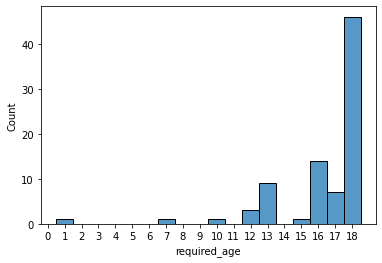

In [22]:
# Histogram of required ages>0
column_name = "required_age"
g = sns.histplot(data=df_loaded[df_loaded[column_name]>0], x=column_name, discrete=True, binwidth=1)
g.set_xticks(range(19))
plt.show()
# Some values here may not be accurate

In [23]:
df_loaded[df_loaded.required_age==1]  # it has PEGI12 score

,type,name,required_age,is_free,detailed_description,about_the_game,short_description,supported_languages,header_image,website,...,total_reviews,controller_support,dlc,demos,recommendations,achievements,reviews,ext_user_account_notice,metacritic,drm_notice
steam_appid,,,,,,,,,,,,,,,,,,,,,
475550,game,Beholder,1,False,"<h1>new game from alawar</h1><p><a href=""https...",Welcome to a grim dystopian future.<br>A total...,You’re a state-installed landlord in a totalit...,"English<strong>*</strong>, Russian<strong>*</s...",https://cdn.akamai.steamstatic.com/steam/apps/...,https://beholder-game.com/promo,...,2102,full,"[553670, 616950]",NaN,{'total': 14923},"{'total': 60, 'highlighted': [{'name': 'Die Li...",NaN,NaN,"{'score': 75, 'url': 'https://www.metacritic.c...",NaN


In [24]:
df_loaded.loc[df_loaded.required_age==1, "required_age"] = 12

In [25]:
df_loaded[df_loaded.required_age==7]  # correct

,type,name,required_age,is_free,detailed_description,about_the_game,short_description,supported_languages,header_image,website,...,total_reviews,controller_support,dlc,demos,recommendations,achievements,reviews,ext_user_account_notice,metacritic,drm_notice
steam_appid,,,,,,,,,,,,,,,,,,,,,
427820,game,Hitman GO: Definitive Edition,7,False,"Hitman GO is a simple to play, but difficult t...","Hitman GO is a simple to play, but difficult t...","Hitman GO is a simple to play, but difficult t...","English<strong>*</strong>, French<strong>*</st...",https://cdn.akamai.steamstatic.com/steam/apps/...,http://www.hitmango.com,...,675,full,NaN,NaN,{'total': 1506},"{'total': 26, 'highlighted': [{'name': 'Silent...",NaN,NaN,"{'score': 72, 'url': 'https://www.metacritic.c...",NaN


In [26]:
df_loaded[df_loaded.required_age==10]  # it has PEGI11+ which is the same as PEGI 12

,type,name,required_age,is_free,detailed_description,about_the_game,short_description,supported_languages,header_image,website,...,total_reviews,controller_support,dlc,demos,recommendations,achievements,reviews,ext_user_account_notice,metacritic,drm_notice
steam_appid,,,,,,,,,,,,,,,,,,,,,
455000,game,The Lost,10,False,<h1>notice</h1><p>Hey everyone! Thanks for you...,All starts from a love tragedy.<br />\r\nA man...,Ancient Chinese style 3D action puzzle indie g...,"English<strong>*</strong>, Simplified Chinese<...",https://cdn.akamai.steamstatic.com/steam/apps/...,None,...,1,NaN,NaN,NaN,NaN,"{'total': 29, 'highlighted': [{'name': '倩', 'p...",NaN,NaN,NaN,NaN


In [27]:
df_loaded.loc[df_loaded.required_age==10, "required_age"] = 12

In [28]:
df_loaded[df_loaded.required_age==13]  # probably the same as PEGI 12

,type,name,required_age,is_free,detailed_description,about_the_game,short_description,supported_languages,header_image,website,...,total_reviews,controller_support,dlc,demos,recommendations,achievements,reviews,ext_user_account_notice,metacritic,drm_notice
steam_appid,,,,,,,,,,,,,,,,,,,,,
505080,game,Gakuen Club,13,False,-------------------------------<br />\r\n・This...,-------------------------------<br />\r\n・This...,Gakuen Club is a school life love story that b...,"English, Japanese<strong>*</strong><br><strong...",https://cdn.akamai.steamstatic.com/steam/apps/...,http://gaclub.operahouse.co.jp/,...,38,NaN,NaN,NaN,NaN,"{'total': 16, 'highlighted': [{'name': 'Welcom...",NaN,NaN,NaN,NaN
494440,game,The Amazing Shinsengumi: Heroes in Love,13,False,-------------------<br><strong>This app contai...,-------------------<br><strong>This app contai...,The Shinsengumi: defenders of the capital. In ...,"English, Simplified Chinese, Japanese",https://cdn.akamai.steamstatic.com/steam/apps/...,https://www.d3p.co.jp/dogenzaka-lab/,...,38,NaN,NaN,NaN,NaN,"{'total': 18, 'highlighted': [{'name': 'Comple...","7.5/10 – <a href=""https://steamcommunity.com/l...",NaN,NaN,NaN
494450,game,Office lovers,13,False,-------------------<br><strong>This app contai...,-------------------<br><strong>This app contai...,It's a romance game where you can experience t...,"English, Simplified Chinese, Japanese",https://cdn.akamai.steamstatic.com/steam/apps/...,https://www.d3p.co.jp/dogenzaka-lab/,...,55,NaN,NaN,NaN,NaN,"{'total': 13, 'highlighted': [{'name': 'Comple...","8/10 – <a href=""https://steamcommunity.com/lin...",NaN,NaN,NaN
447170,game,"Destiny's Princess: A War Story, A Love Story",13,False,-------------------<br><strong>This app contai...,-------------------<br><strong>This app contai...,It's a game for girls designed with a dramatic...,"English, Simplified Chinese, Japanese",https://cdn.akamai.steamstatic.com/steam/apps/...,https://www.d3p.co.jp/dogenzaka-lab/,...,100,NaN,[449900],NaN,{'total': 220},"{'total': 13, 'highlighted': [{'name': 'Comple...","8/10 – <a href=""https://steamcommunity.com/lin...",NaN,NaN,NaN
447180,game,My Secret Pets!,13,False,-------------------<br><strong>This app contai...,-------------------<br><strong>This app contai...,&quot;My Secret Pets!&quot; is a romance game ...,"English, Simplified Chinese, Japanese",https://cdn.akamai.steamstatic.com/steam/apps/...,https://www.d3p.co.jp/dogenzaka-lab/,...,68,NaN,[449910],NaN,{'total': 105},"{'total': 13, 'highlighted': [{'name': 'Comple...",NaN,NaN,NaN,NaN
447190,game,Pub Encounter,13,False,-------------------<br><strong>This app contai...,-------------------<br><strong>This app contai...,&quot;Pub Encounter&quot; is a romance game wh...,"English, Simplified Chinese, Japanese",https://cdn.akamai.steamstatic.com/steam/apps/...,https://www.d3p.co.jp/dogenzaka-lab/,...,106,NaN,[449920],NaN,{'total': 179},"{'total': 15, 'highlighted': [{'name': 'Welcom...",NaN,NaN,NaN,NaN
447200,game,The Men of Yoshiwara: Ohgiya,13,False,-------------------<br><strong>This app contai...,-------------------<br><strong>This app contai...,&quot;The Men of Yoshiwara: Ohgiya&quot; is a ...,"English, Traditional Chinese, Japanese",https://cdn.akamai.steamstatic.com/steam/apps/...,https://www.d3p.co.jp/dogenzaka-lab/,...,90,NaN,[449930],NaN,{'total': 164},"{'total': 13, 'highlighted': [{'name': 'Welcom...","8.5/10 – <a href=""https://steamcommunity.com/l...",NaN,NaN,NaN
437610,game,SQUIDS FROM SPACE,13,True,"<img src=""https://cdn.akamai.steamstatic.com/s...","<img src=""https://cdn.akamai.steamstatic.com/s...","SQUIDS FROM SPACE is an 8v8, team-based PvP to...","English, French, Italian, German, Spanish - Sp...",https://cdn.akamai.steamstatic.com/steam/apps/...,http://www.SquidsFromSpace.com,...,39,full,"[1155040, 1155041]",NaN,NaN,NaN,NaN,NaN,NaN,NaN
423610,game,Where's My Mommy?,13,False,<i>&quot;The craziest runner ever made!&quot;<...,<i>&quot;The craziest runner ever made!&quot;<...,Poopy was livin

In [29]:
df_loaded.loc[df_loaded.required_age==13, "required_age"] = 12

In [30]:
df_loaded[df_loaded.required_age==15]  # probably the same as PEGI 16

,type,name,required_age,is_free,detailed_description,about_the_game,short_description,supported_languages,header_image,website,...,total_reviews,controller_support,dlc,demos,recommendations,achievements,reviews,ext_user_account_notice,metacritic,drm_notice
steam_appid,,,,,,,,,,,,,,,,,,,,,
469990,game,NEKOPALIVE,15,True,"<img src=""https://cdn.akamai.steamstatic.com/s...","<img src=""https://cdn.akamai.steamstatic.com/s...",The catgirls of La Soleil takes to the stage a...,"Japanese<strong>*</strong>, English<br><strong...",https://cdn.akamai.steamstatic.com/steam/apps/...,http://nekovr.club/,...,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [31]:
df_loaded.loc[df_loaded.required_age==15, "required_age"] = 16

In [32]:
df_loaded[df_loaded.required_age==17]  # probably the same as PEGI 18

,type,name,required_age,is_free,detailed_description,about_the_game,short_description,supported_languages,header_image,website,...,total_reviews,controller_support,dlc,demos,recommendations,achievements,reviews,ext_user_account_notice,metacritic,drm_notice
steam_appid,,,,,,,,,,,,,,,,,,,,,
505070,game,Secrets of Me,17,False,-------------------<br><strong>This app contai...,-------------------<br><strong>This app contai...,"&quot;Secrets of Me&quot; is a game where, aft...","English, Traditional Chinese, Japanese",https://cdn.akamai.steamstatic.com/steam/apps/...,https://www.d3p.co.jp/dogenzaka-lab/,...,27,NaN,NaN,NaN,NaN,"{'total': 13, 'highlighted': [{'name': 'Comple...","8.5/10 – <a href=""https://steamcommunity.com/l...",NaN,NaN,NaN
501590,game,Bulletstorm: Full Clip Edition,17,False,Step into the boots of Grayson Hunt after a cr...,Step into the boots of Grayson Hunt after a cr...,Step into the boots of Grayson Hunt after a cr...,"English<strong>*</strong>, French<strong>*</st...",https://cdn.akamai.steamstatic.com/steam/apps/...,http://www.bulletstorm.com,...,1879,full,NaN,NaN,{'total': 4201},"{'total': 60, 'highlighted': [{'name': 'Destru...",NaN,NaN,"{'score': 76, 'url': 'https://www.metacritic.c...",NaN
494460,game,Dangerous Relationship,17,False,-------------------<br><strong>This app contai...,-------------------<br><strong>This app contai...,&quot;Dangerous Relationship&quot; is a game w...,"English, Japanese, Simplified Chinese",https://cdn.akamai.steamstatic.com/steam/apps/...,https://www.d3p.co.jp/dogenzaka-lab/,...,42,NaN,NaN,NaN,NaN,"{'total': 13, 'highlighted': [{'name': 'Comple...",NaN,NaN,NaN,NaN
494470,game,My Butler,17,False,-------------------<br><strong>This app contai...,-------------------<br><strong>This app contai...,&quot;My Butler&quot; is a game where you can ...,"English, Simplified Chinese, Japanese",https://cdn.akamai.steamstatic.com/steam/apps/...,https://www.d3p.co.jp/dogenzaka-lab/,...,51,NaN,NaN,NaN,NaN,"{'total': 9, 'highlighted': [{'name': 'Complet...",NaN,NaN,NaN,NaN
465510,game,Sinful Eden,17,False,Sinful Eden is a point 'n' click adventure wit...,Sinful Eden is a point 'n' click adventure wit...,Sinful Eden is a point 'n' click adventure wit...,English,https://cdn.akamai.steamstatic.com/steam/apps/...,http://www.dualhaze.net/,...,21,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
460790,game,Bayonetta,17,False,"<img src=""https://cdn.akamai.steamstatic.com/s...","<img src=""https://cdn.akamai.steamstatic.com/s...",PlatinumGames’ universally acclaimed action ma...,"English<strong>*</strong>, French, Italian, Ge...",https://cdn.akamai.steamstatic.com/steam/apps/...,None,...,5489,full,NaN,NaN,{'total': 14968},"{'total': 50, 'highlighted': [{'name': 'A Prim...",“This is how you port a classic”<br>93/100 – <...,NaN,"{'score': 90, 'url': 'https://www.metacritic.c...",NaN
1131330,game,CLOSED,17,False,,,,"English<strong>*</strong>, Japanese, Tradition...",https://cdn.akamai.steamstatic.com/steam/apps/...,None,...,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [33]:
df_loaded.loc[df_loaded.required_age==17, "required_age"] = 18

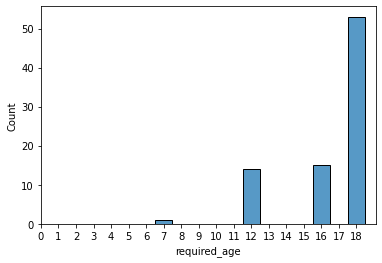

In [34]:
# Histogram of required ages>0
column_name = "required_age"
g = sns.histplot(data=df_loaded[df_loaded[column_name]>0], x=column_name, discrete=True, binwidth=1)
g.set_xticks(range(19))
plt.show()
# Some values here may not be accurate

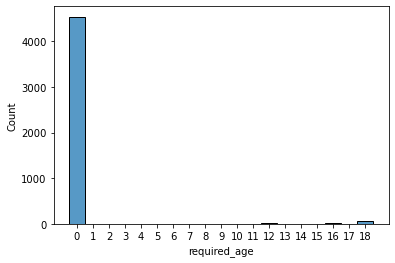

In [35]:
# Histogram of required ages
column_name = "required_age"
g = sns.histplot(data=df_loaded, x=column_name, discrete=True, binwidth=1)
g.set_xticks(range(19))
plt.show()
# Some values here may not be accurate

In [36]:
# required age, again
column_name = "required_age"
print(df_loaded[column_name].nunique())
print(type(df_loaded.iloc[0][column_name]))
print(df_loaded[column_name].value_counts())

5
<class 'numpy.uint8'>
0     4539
18      53
16      15
12      14
7        1
Name: required_age, dtype: int64


In [37]:
# is_free
column_name = "is_free"
print(df_loaded[column_name].nunique())
print(type(df_loaded.iloc[0][column_name]))
print(df_loaded[column_name].value_counts())
df_loaded[column_name] = df_loaded[column_name].astype('boolean')  # convert to boolean

2
<class 'bool'>
False    4346
True      276
Name: is_free, dtype: int64


In [38]:
# detailed_description, about_the_game, short_description 
# probably not needed for now
columns_to_drop = ["detailed_description", "about_the_game", "short_description"]
df_loaded.drop(columns=columns_to_drop, inplace=True)

In [39]:
# header_image, website
# links don't work
columns_to_drop = ["header_image", "website"]
df_loaded.drop(columns=columns_to_drop, inplace=True)

In [40]:
# genres
column_name = "genres"
df_loaded[column_name]

steam_appid
1198490           [{'id': '25', 'description': 'Adventure'}]
1198510    [{'id': '1', 'description': 'Action'}, {'id': ...
1198550    [{'id': '1', 'description': 'Action'}, {'id': ...
1198600    [{'id': '1', 'description': 'Action'}, {'id': ...
1198630               [{'id': '4', 'description': 'Casual'}]
                                 ...                        
1113770    [{'id': '1', 'description': 'Action'}, {'id': ...
1113780    [{'id': '25', 'description': 'Adventure'}, {'i...
1113000                  [{'id': '3', 'description': 'RPG'}]
1113060    [{'id': '4', 'description': 'Casual'}, {'id': ...
1113110    [{'id': '1', 'description': 'Action'}, {'id': ...
Name: genres, Length: 4622, dtype: object

In [41]:
# In the column genres, replace np.nan with []
column_name = "genres"
df_loaded[column_name] = df_loaded[column_name].map(lambda x: [] if x is np.nan else x)

In [42]:
# All genres that occur in the dataset
column_name = "genres"
genre_list = []
for idrow in range(df_loaded.shape[0]):
    value = df_loaded[column_name].iloc[idrow]
    genre_list.extend(value)
genre_list = [[elem['id'], elem['description']] for elem in genre_list]

In [43]:
# Translate genre names to avoid errors while checking for genre_id errors
def translate_genre_names(genre):
    translation_dict = {"Aktion": "Action", 
                        "Abenteuer": "Adventure", 
                        "Avontuur": "Adventure", 
                        "Simulatie": "Simulation", 
                        "Animacja i modelowanie": "Animation & Modeling", 
                        "Projektowanie i ilustrowanie": "Design & Illustration", 
                        "Produkcja gier": "Game Development"}
    
    if genre is not None:
        for key in translation_dict.keys():
            genre = genre.replace(key, translation_dict[key])
            
    return genre
    
genre_list = [[elem[0], translate_genre_names(elem[1])] for elem in genre_list]

In [44]:
# Generate dictionary of genre id's
# Check that each genre has a unique id
genre_id_dict = {} 
for genre in genre_list:
    genre_id = genre[0]
    if genre_id not in genre_id_dict.keys():
        genre_id_dict[genre_id] = genre[1]
    else:
        if genre_id_dict[genre_id] != genre[1]:
            print("Error with keys")
            print(genre)
            print(genre_id, genre_id_dict[genre_id])
            break

In [45]:
# For genres, only keep genre ids
column_name = "genres"
df_loaded[column_name] = df_loaded[column_name].map(lambda x: [y['id'] for y in x] if x is not np.nan else x)

In [46]:
# Table for genre ids
df_genres = pd.DataFrame(list(genre_id_dict.items()), columns=["genre_id", "genres"])
df_genres = df_genres.set_index("genre_id")
df_genres = df_genres.rename(columns={'genres': 'genre'})
df_genres

,genre
genre_id,
25,Adventure
1,Action
23,Indie
4,Casual
3,RPG
28,Simulation
2,Strategy
70,Early Access
18,Sports


In [47]:
# price_overview
column_name = "price_overview"
print(df_loaded.iloc[0][column_name])
df_loaded[column_name]

{'currency': 'EUR', 'initial': 239, 'final': 239, 'discount_percent': 0, 'initial_formatted': '', 'final_formatted': '2,39€'}


steam_appid
1198490    {'currency': 'EUR', 'initial': 239, 'final': 2...
1198510    {'currency': 'EUR', 'initial': 999, 'final': 9...
1198550    {'currency': 'EUR', 'initial': 79, 'final': 79...
1198600    {'currency': 'EUR', 'initial': 499, 'final': 4...
1198630    {'currency': 'EUR', 'initial': 999, 'final': 9...
                                 ...                        
1113770    {'currency': 'EUR', 'initial': 1079, 'final': ...
1113780    {'currency': 'EUR', 'initial': 1499, 'final': ...
1113000    {'currency': 'EUR', 'initial': 1999, 'final': ...
1113060    {'currency': 'EUR', 'initial': 1679, 'final': ...
1113110    {'currency': 'EUR', 'initial': 659, 'final': 6...
Name: price_overview, Length: 4622, dtype: object

In [48]:
column_name = "price_overview"
df_price = pd.json_normalize(df_loaded[column_name])
df_price = df_price.set_index(df_loaded.index)
df_price

,currency,initial,final,discount_percent,initial_formatted,final_formatted,recurring_sub,recurring_sub_desc
steam_appid,,,,,,,,
1198490,EUR,239.0,239.0,0.0,,"2,39€",NaN,NaN
1198510,EUR,999.0,999.0,0.0,,"9,99€",NaN,NaN
1198550,EUR,79.0,79.0,0.0,,"0,79€",NaN,NaN
1198600,EUR,499.0,499.0,0.0,,"4,99€",NaN,NaN
1198630,EUR,999.0,999.0,0.0,,"9,99€",NaN,NaN
...,...,...,...,...,...,...,...,...
1113770,EUR,1079.0,1079.0,0.0,,"10,79€",NaN,NaN
1113780,EUR,1499.0,1499.0,0.0,,"14,99€",NaN,NaN
1113000,EUR,1999.0,1999.0,0.0,,"19,99€",NaN,NaN


In [49]:
# Currencies
df_price.currency.value_counts()

EUR    4235
USD       8
GBP       2
CAD       1
CHF       1
KRW       1
PLN       1
MYR       1
Name: currency, dtype: int64

In [50]:
# Validate prices in numbers and strings
def clean_formatted_prices(row):
    numbers_formatted_column_list = ["initial_formatted", "final_formatted"]
    numbers_column_list = ["initial", "final"]
    # Replace currency signs
    # Use a dictionary to indirectly check if currencies match in all columns
    replacement_dict = {
        "EUR": {"€": "", ".--": ".00"}, 
        "USD": {"$": "", " USD": ""}, 
        "GBP": {"£": ""}, 
        "CAD": {"CDN$ ": ""}, 
        "CHF": {"CHF": "", ".--": ".00"}, 
        "KRW": {"₩": ""}, 
        "PLN": {"zł": ""}, 
        "MYR": {"RM": ""}
    }
    
    currency = row["currency"]
    for col in numbers_formatted_column_list:
        val = row[col]
        if val == "":
            val = np.nan
        if val is not np.nan:
            val = val.replace(",", ".")
            for str_to_replace in replacement_dict[currency].keys():
                val = val.replace(str_to_replace, replacement_dict[currency][str_to_replace])
        val = np.float64(val)
        row[col] = val
    
    for col in numbers_column_list:
        val = row[col]
        if val == "":
            val = np.nan
        if currency=="KRW": 
            val = val/1.e05
        else:
            val = val/1.e02
        row[col] = val
        
    return row

df_price = df_price.apply(lambda x: clean_formatted_prices(x), axis=1)
df_price

,currency,initial,final,discount_percent,initial_formatted,final_formatted,recurring_sub,recurring_sub_desc
steam_appid,,,,,,,,
1198490,EUR,2.39,2.39,0.0,NaN,2.39,NaN,NaN
1198510,EUR,9.99,9.99,0.0,NaN,9.99,NaN,NaN
1198550,EUR,0.79,0.79,0.0,NaN,0.79,NaN,NaN
1198600,EUR,4.99,4.99,0.0,NaN,4.99,NaN,NaN
1198630,EUR,9.99,9.99,0.0,NaN,9.99,NaN,NaN
...,...,...,...,...,...,...,...,...
1113770,EUR,10.79,10.79,0.0,NaN,10.79,NaN,NaN
1113780,EUR,14.99,14.99,0.0,NaN,14.99,NaN,NaN
1113000,EUR,19.99,19.99,0.0,NaN,19.99,NaN,NaN


In [51]:
# Check if columns agree on the values
print((df_price.initial-df_price.initial_formatted).unique())
print((df_price.final-df_price.final_formatted).unique())

[nan  0.]
[ 0. nan]


In [52]:
# Drop columns 
columns_to_drop = ["initial_formatted", "final_formatted"]
df_price.drop(columns=columns_to_drop, inplace=True)

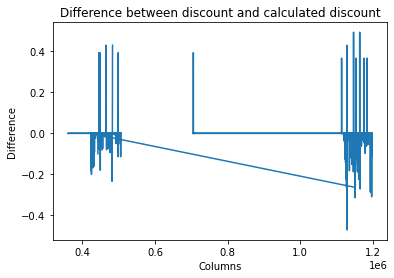

count    4250.000000
mean       -0.000523
std         0.030773
min        -0.471698
25%         0.000000
50%         0.000000
75%         0.000000
max         0.493671
dtype: float64

In [53]:
# discount_price
plt.plot(df_price.discount_percent-(-(df_price.final-df_price.initial)/df_price.initial*100))
plt.title("Difference between discount and calculated discount")
plt.xlabel("Columns")
plt.ylabel("Difference")
plt.show()
(df_price.discount_percent-(-(df_price.final-df_price.initial)/df_price.initial*100)).describe()
# The calculations match

In [54]:
# recurring_sub
df_price.recurring_sub.unique()

array([    nan, 330574., 204408., 382133., 496383.])

In [55]:
# recurring_sub_desc
print(df_price[df_price.recurring_sub.isna()].recurring_sub_desc.unique())
df_price[df_price.recurring_sub.isna()==False].recurring_sub_desc.unique()

[nan]


array(['12,49€ at checkout, auto-renewed every 1 month(s) at 8,19€.',
       '3,99€ at checkout, auto-renewed every 1 month(s) at 3,99€.',
       '5,73€ at checkout, auto-renewed every 1 month(s) at 33,99€.',
       '8,19€ at checkout, auto-renewed every 1 month(s) at 3,29€.'],
      dtype=object)

In [56]:
# Add columns for recurring subscriptions
df_price["sub_initial"] = np.nan
df_price["sub_renewal_months"] = np.nan
df_price["sub_monthly"] = np.nan

In [57]:
def get_subscription_data(row):
    column_name = "recurring_sub_desc"
    pattern = "^(?P<price_int>\d+)[,](?P<price_dec>\d+). at checkout, auto-renewed every (?P<month>\d+) month\(s\) at "
    pattern += "(?P<price2_int>\d+)[,](?P<price2_dec>\d+)."

    val = row[column_name]    
    
    if val is not np.nan:
        print(val)
        m = re.search(pattern, val)
        row["sub_initial"] = np.float64((m.group("price_int") + "," + m.group("price_dec")).replace(",", "."))
        row["sub_renewal_months"] = np.float64(m.group("month"))
        row["sub_monthly"] = np.float64((m.group("price2_int") + "," + m.group("price2_dec")).replace(",", "."))
    
    return row

df_price = df_price.apply(lambda x: get_subscription_data(x), axis=1)
df_price[["recurring_sub_desc", "sub_initial", "sub_renewal_months", "sub_monthly"]][df_price.recurring_sub.isna()==False]

12,49€ at checkout, auto-renewed every 1 month(s) at 8,19€.
3,99€ at checkout, auto-renewed every 1 month(s) at 3,99€.
5,73€ at checkout, auto-renewed every 1 month(s) at 33,99€.
8,19€ at checkout, auto-renewed every 1 month(s) at 3,29€.


,recurring_sub_desc,sub_initial,sub_renewal_months,sub_monthly
steam_appid,,,,
503280,"12,49€ at checkout, auto-renewed every 1 month...",12.49,1.0,8.19
489160,"3,99€ at checkout, auto-renewed every 1 month(...",3.99,1.0,3.99
451520,"5,73€ at checkout, auto-renewed every 1 month(...",5.73,1.0,33.99
433910,"8,19€ at checkout, auto-renewed every 1 month(...",8.19,1.0,3.29


In [58]:
# Drop column
columns_to_drop = ["recurring_sub_desc"]
df_price.drop(columns=columns_to_drop, inplace=True)

In [59]:
# Drop column price_overview from the original table and and add the price table to it
columns_to_drop = ["price_overview"]
df_loaded.drop(columns=columns_to_drop, inplace=True)
df_price = df_price.add_prefix('price_')
df_loaded = pd.concat([df_loaded, df_price], axis=1)

In [60]:
# Export the metadata DataFrame to a csv file
file_name = 'database_cleaned.csv'
df_loaded.to_csv(os.path.join(data_preproc_dir, file_name), header=True, index=True)

file_name = 'genres_cleaned.csv'
df_genres.to_csv(os.path.join(data_preproc_dir, file_name), header=True, index=True)

In [64]:
df_loaded.total_reviews

steam_appid
1198490        4
1198510      134
1198550        1
1198600       18
1198630       10
           ...  
1113770       13
1113780       30
1113000    29998
1113060        4
1113110        2
Name: total_reviews, Length: 4622, dtype: object

In [61]:
df_loaded[df_loaded["mac_requirements"].map(lambda x: len(x)==0)].mac_requirements

steam_appid
1198510    []
1198550    []
1198600    []
1198810    []
1198210    []
           ..
1113740    []
1113750    []
1113760    []
1113000    []
1113060    []
Name: mac_requirements, Length: 2571, dtype: object